## Single Variable

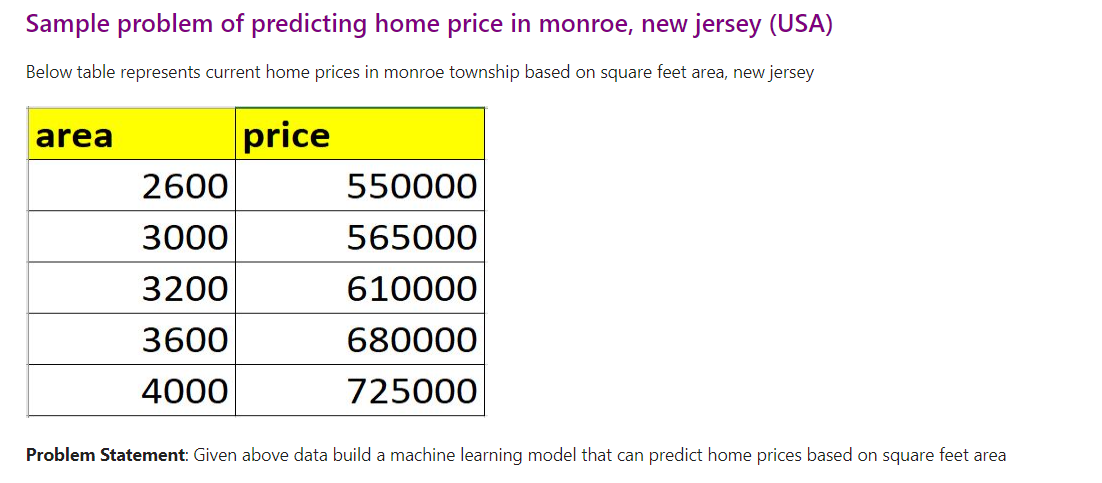

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


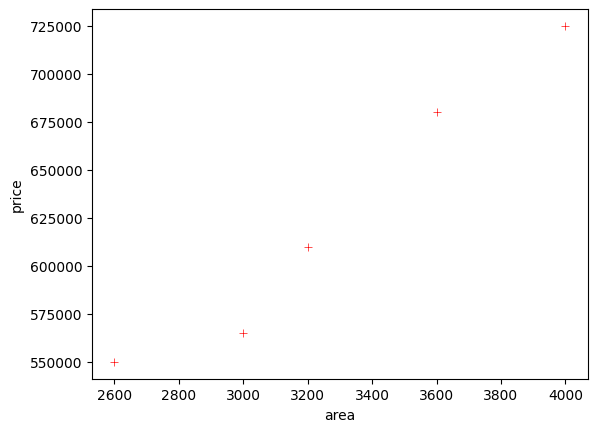

In [14]:
sns.scatterplot(df,x="area",y="price",color="red",marker="+")
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [18]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(df[["area"]],df[["price"]])

LinearRegression()

(1) Predict price of a home with area = 3300 sqr ft

In [19]:
reg.predict([[3300]])

C:\Users\SPPL IT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[628715.75342466]])